# Matplotlib, Numpy and Pandas Practice
## Kindly scroll down to view the BG Task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Global API


In [2]:
x = np.arange(-10, 11)

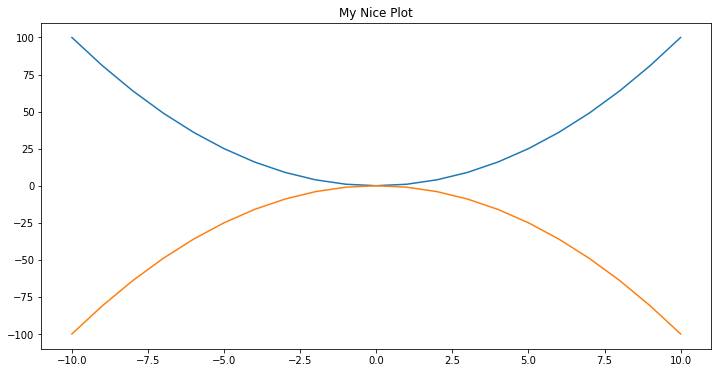

In [3]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))


Text(0, 0.5, 'X Squared')

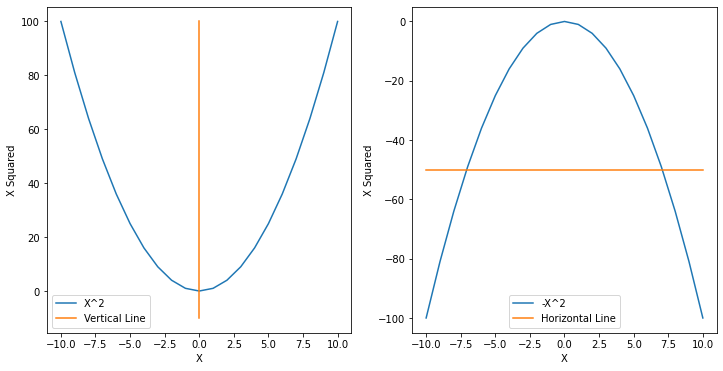

In [4]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

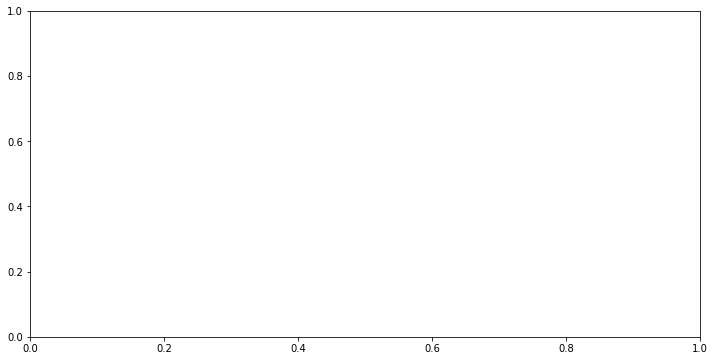

In [5]:
fig, axes = plt.subplots(figsize=(12, 6))

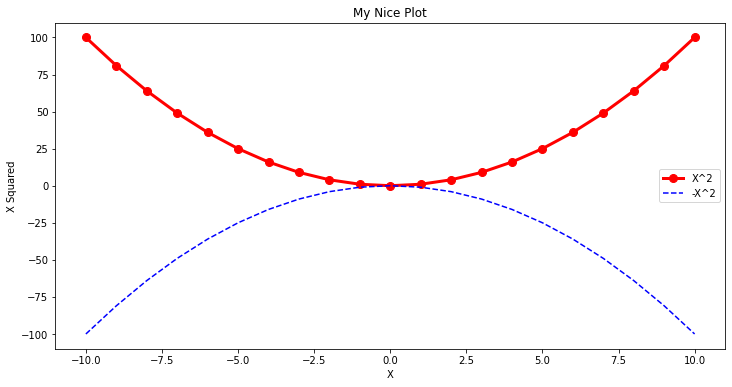

In [6]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

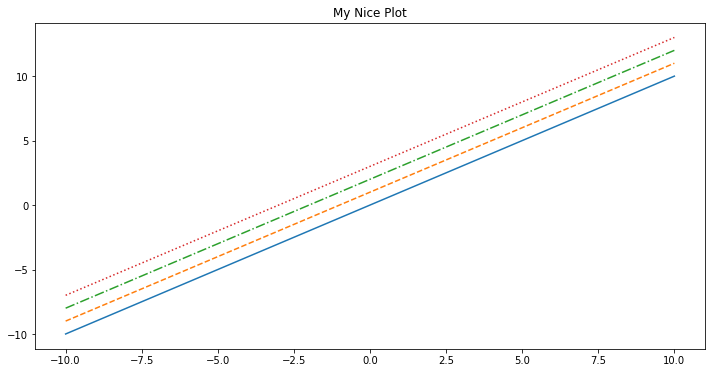

In [7]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

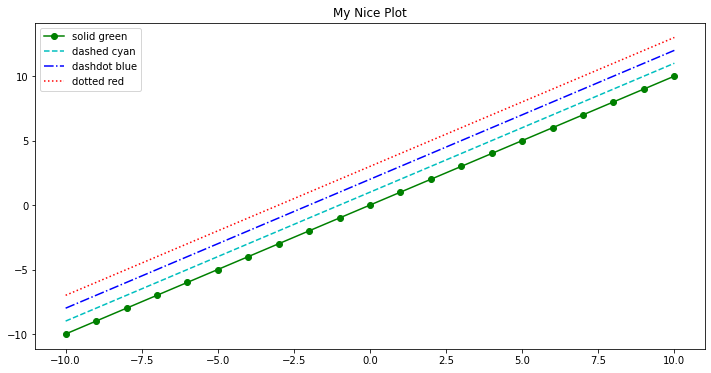

In [8]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [9]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [10]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']



## Other types of plots

### Figures and subfigures


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

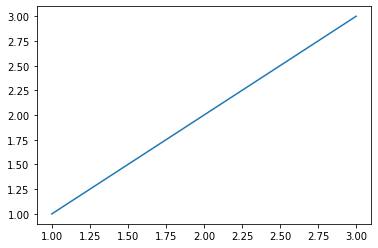

In [11]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the `nrows` and `ncols` params.

(<Figure size 1008x432 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

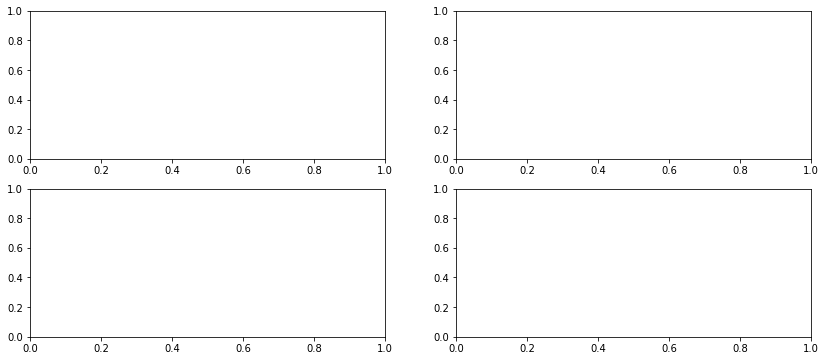

In [12]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

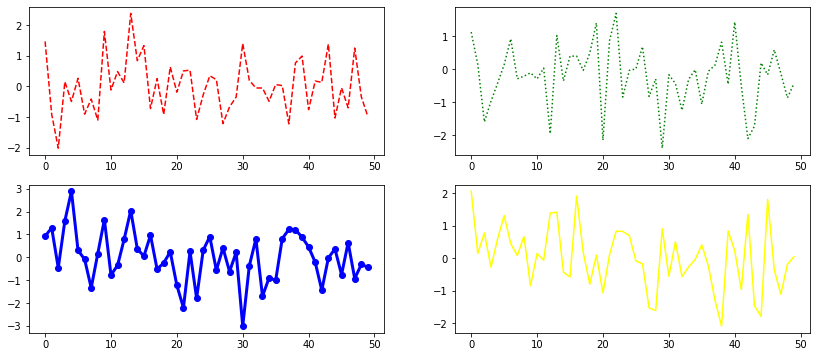

In [13]:
ax4.plot(np.random.randn(50), c='yellow') 

ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')

ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

#### The `subplot2grid` command


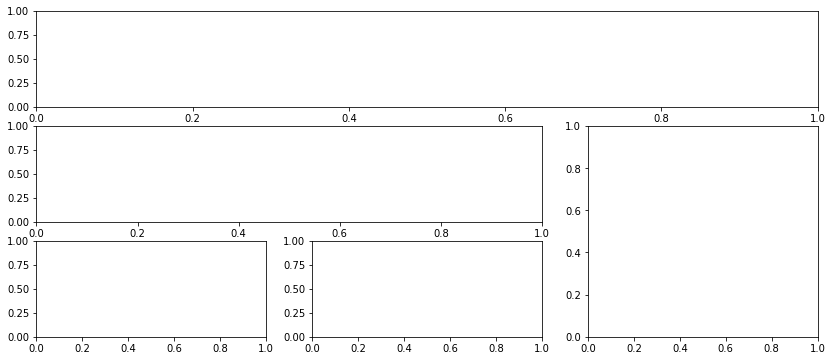

In [14]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)

ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)


ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)

ax4 = plt.subplot2grid((3,3), (2,0))



ax5 = plt.subplot2grid((3,3), (2,1))

### Scatter Plot

In [15]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

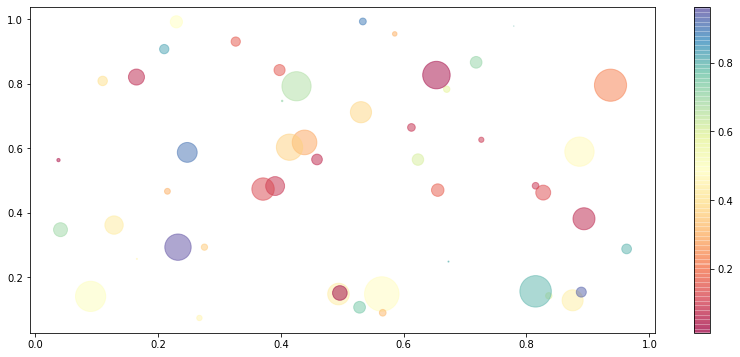

In [16]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

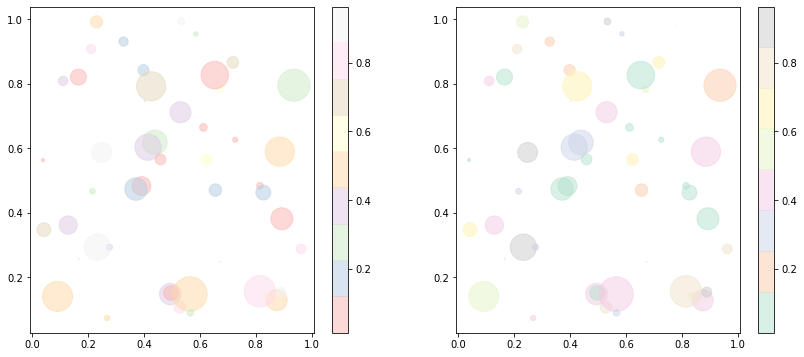

In [17]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

Here is the full `cmap` options available: https://matplotlib.org/users/colormaps.html

### Histograms

In [18]:
values = np.random.randn(1000)

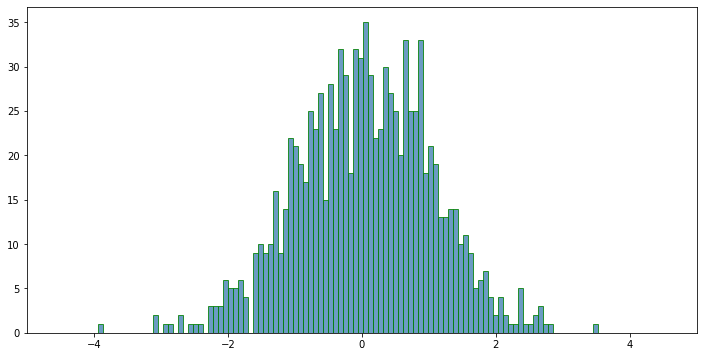

In [19]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [20]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [21]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

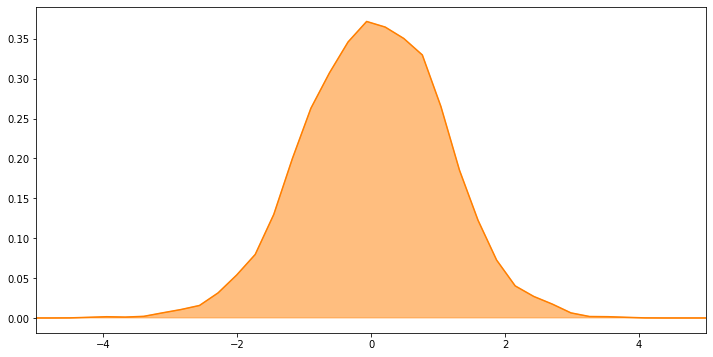

In [22]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots

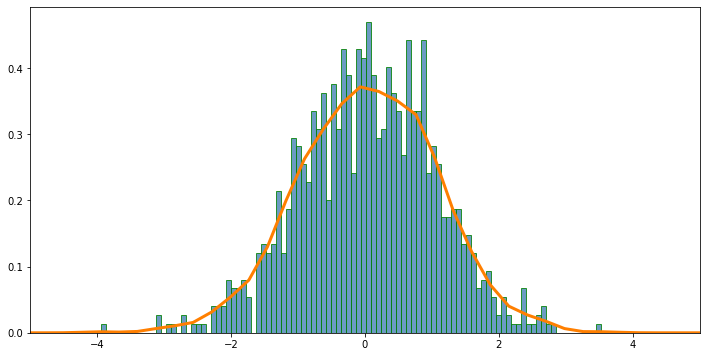

In [23]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar plots

In [24]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

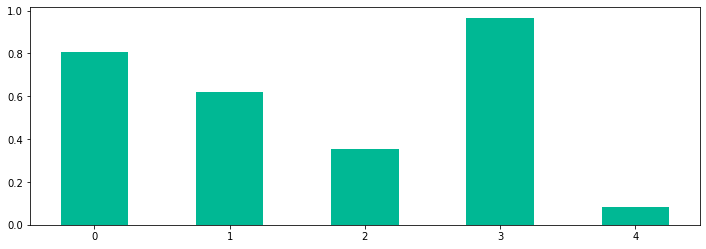

In [25]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

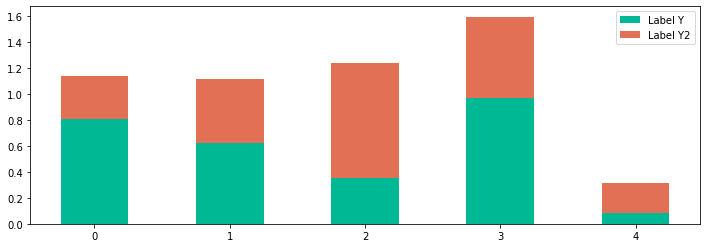

In [26]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection

In [27]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 3., 7., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

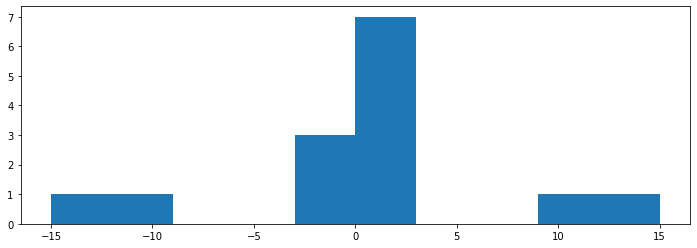

In [28]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6ec8b94a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6ec8b9a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6ec8b9240>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6ec84a048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6ec84a320>],
 'means': []}

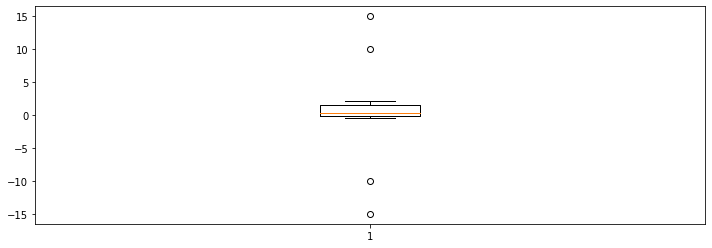

In [29]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

# Babban Gona Visualization Task

So basically here's what you guys can do with it:

- Clean it and display a distribution or chart of the most common products that were bought for the various type of shipments. 

- And then a general chart of the products and the most common period of the year when they were ordered.

In [30]:
df = pd.read_csv(
    'user_waybill.csv',
    index_col=0,
    parse_dates=True
)
print(df)

                                waybill_id  \
id                                           
1            WT0000000014-00001-1534516057   
2            WT0000000051-00007-1534517803   
3            WT0000000014-00003-1534520097   
4            WT0000000014-00003-1534520151   
6                     WT19-00045-43335.434   
...                                    ...   
28878  WT0000000274-44063-44061.475-Revert   
28879  WT0000000274-38063-44061.475-Revert   
28880  WT0000000274-83010-44061.483-Revert   
28881  WT0000000274-02003-44061.484-Revert   
28882  WT0000000274-10065-44061.485-Revert   

                                description   product_id        ship_from  \
id                                                                          
1               Admin: Advert and Promotion    100000001  NG-KN-1002-000R   
2                         Admin:Cooking Gas    100000007        NG-TEST-1   
3                        Admin: Bank Charge    100000003        NG-TEST-1   
4               

In [31]:
df.index

Int64Index([    1,     2,     3,     4,     6,    10,    11,    12,    13,
               14,
            ...
            28873, 28874, 28875, 28876, 28877, 28878, 28879, 28880, 28881,
            28882],
           dtype='int64', name='id', length=28804)

In [32]:
df.size

518472

In [33]:
df.info

<bound method DataFrame.info of                                 waybill_id  \
id                                           
1            WT0000000014-00001-1534516057   
2            WT0000000051-00007-1534517803   
3            WT0000000014-00003-1534520097   
4            WT0000000014-00003-1534520151   
6                     WT19-00045-43335.434   
...                                    ...   
28878  WT0000000274-44063-44061.475-Revert   
28879  WT0000000274-38063-44061.475-Revert   
28880  WT0000000274-83010-44061.483-Revert   
28881  WT0000000274-02003-44061.484-Revert   
28882  WT0000000274-10065-44061.485-Revert   

                                description   product_id        ship_from  \
id                                                                          
1               Admin: Advert and Promotion    100000001  NG-KN-1002-000R   
2                         Admin:Cooking Gas    100000007        NG-TEST-1   
3                        Admin: Bank Charge    100000003     

In [34]:
df.describe()

,quantity
count,28573.000000
mean,404.530580
std,4012.591712
min,0.500000
25%,14.000000
50%,55.000000
75%,240.000000
max,302000.000000


In [35]:
df.shape

(28804, 18)

In [36]:
df.iloc[0]

waybill_id           WT0000000014-00001-1534516057
description            Admin: Advert and Promotion
product_id                               100000001
ship_from                          NG-KN-1002-000R
destination                         T-000000000014
delivery_address                               NaN
intended_location                              NaN
quantity                                        10
unit                                       Sachets
batch_code                                     NaN
unit_of_measure                                NaN
emailAddress                   rehobothi@yahoo.com
date                           2018-08-17 14:27:37
personnelName                     Iyasele Rehoboth
status                                    Approved
hub                                            NaN
notes                                          NaN
transaction_type                    Trans-Shipment
Name: 1, dtype: object

In [37]:
df

,waybill_id,description,product_id,ship_from,destination,delivery_address,intended_location,quantity,unit,batch_code,unit_of_measure,emailAddress,date,personnelName,status,hub,notes,transaction_type
id,,,,,,,,,,,,,,,,,,
1,WT0000000014-00001-1534516057,Admin: Advert and Promotion,100000001,NG-KN-1002-000R,T-000000000014,NaN,NaN,10.0,Sachets,NaN,NaN,rehobothi@yahoo.com,2018-08-17 14:27:37,Iyasele Rehoboth,Approved,NaN,NaN,Trans-Shipment
2,WT0000000051-00007-1534517803,Admin:Cooking Gas,100000007,NG-TEST-1,T-000000000051,NaN,NaN,50.0,Bags,NaN,NaN,nnamdi.iwuji@babbangona.com,2018-08-17 14:56:43,Nnamdi Iwuji,Awaiting Approval,NaN,NaN,Sales Shipment
3,WT0000000014-00003-1534520097,Admin: Bank Charge,100000003,NG-TEST-1,T-000000000014,NaN,NaN,10.0,Packs,BG5050,Bags,rehoboth.iyasele@babbangona.com,2018-08-17 15:34:57,Iyasele Rehoboth,Awaiting Approval,NaN,NaN,Shipment to Customers
4,WT0000000014-00003-1534520151,Admin: Bank Charge,100000003,NG-TEST-2,T-000000000014,NaN,NaN,10.0,Single Items,4555,30 Metric Tons,rehobothi@yahoo.com,2018-08-17 15:35:51,Iyasele Rehoboth,Awaiting Approval,NaN,NaN,Shipment to Customers
6,WT19-00045-43335.434,Produce:Maize-C-White(100kg),100000045,NG-KD-1002-0038,19,NaN,NaN,550.0,Bags,NaN,NaN,john.yohanna@doreopartners.com,2018-08-23 10:25:10,John Yohanna,Declined,NaN,NaN,Sales Shipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28878,WT0000000274-44063-44061.475-Revert,Urea_Indorama_50kg,P5052144063,REVERT,IK00053159,NaN,NaN,5.0,Each,NaN,NaN,rehoboth.iyasele@babbangona.com,2020-11-05 15:30:04,Iyasele Rehoboth,Reverted,NaN,Manual request,MSB Shipment
28879,WT0000000274-38063-44061.475-Revert,DAP_DAP_50kg,P5047138063,REVERT,IK00053159,NaN,NaN,2.0,Each,NaN,NaN,rehoboth.iyasele@babbangona.com,2020-11-05 15:30:35,Iyasele Rehoboth,Reverted,NaN,Manual Request,MSB Shipment
28880,WT0000000274-83010-44061.483-Revert,Maize Seed_SM15C_12.5kg_Assembly_Bag,P8072183010,REVERT,IK00053159,NaN,NaN,2.0,Each,NaN,NaN,rehoboth.iyasele@babbangona.com,2020-11-05 15:31:05,Iyasele Rehoboth,Reverted,NaN,Manual Request,MSB Shipment


In [38]:
df["waybill_id"]

id
1              WT0000000014-00001-1534516057
2              WT0000000051-00007-1534517803
3              WT0000000014-00003-1534520097
4              WT0000000014-00003-1534520151
6                       WT19-00045-43335.434
                        ...                 
28878    WT0000000274-44063-44061.475-Revert
28879    WT0000000274-38063-44061.475-Revert
28880    WT0000000274-83010-44061.483-Revert
28881    WT0000000274-02003-44061.484-Revert
28882    WT0000000274-10065-44061.485-Revert
Name: waybill_id, Length: 28804, dtype: object

So basically here's what you guys can do with it:

- Clean it and display a distribution or chart of the most common products that were bought for the various type of shipments. 

- And then a general chart of the products and the most common period of the year when they were ordered.

## Product ID with Most Quantity

In [39]:
df.head()

,waybill_id,description,product_id,ship_from,destination,delivery_address,intended_location,quantity,unit,batch_code,unit_of_measure,emailAddress,date,personnelName,status,hub,notes,transaction_type
id,,,,,,,,,,,,,,,,,,
1,WT0000000014-00001-1534516057,Admin: Advert and Promotion,100000001,NG-KN-1002-000R,T-000000000014,NaN,NaN,10.0,Sachets,NaN,NaN,rehobothi@yahoo.com,2018-08-17 14:27:37,Iyasele Rehoboth,Approved,NaN,NaN,Trans-Shipment
2,WT0000000051-00007-1534517803,Admin:Cooking Gas,100000007,NG-TEST-1,T-000000000051,NaN,NaN,50.0,Bags,NaN,NaN,nnamdi.iwuji@babbangona.com,2018-08-17 14:56:43,Nnamdi Iwuji,Awaiting Approval,NaN,NaN,Sales Shipment
3,WT0000000014-00003-1534520097,Admin: Bank Charge,100000003,NG-TEST-1,T-000000000014,NaN,NaN,10.0,Packs,BG5050,Bags,rehoboth.iyasele@babbangona.com,2018-08-17 15:34:57,Iyasele Rehoboth,Awaiting Approval,NaN,NaN,Shipment to Customers
4,WT0000000014-00003-1534520151,Admin: Bank Charge,100000003,NG-TEST-2,T-000000000014,NaN,NaN,10.0,Single Items,4555,30 Metric Tons,rehobothi@yahoo.com,2018-08-17 15:35:51,Iyasele Rehoboth,Awaiting Approval,NaN,NaN,Shipment to Customers
6,WT19-00045-43335.434,Produce:Maize-C-White(100kg),100000045,NG-KD-1002-0038,19,NaN,NaN,550.0,Bags,NaN,NaN,john.yohanna@doreopartners.com,2018-08-23 10:25:10,John Yohanna,Declined,NaN,NaN,Sales Shipment


In [40]:
new_data = df[["product_id", "quantity", "date"]]
new_data

,product_id,quantity,date
id,,,
1,100000001,10.0,2018-08-17 14:27:37
2,100000007,50.0,2018-08-17 14:56:43
3,100000003,10.0,2018-08-17 15:34:57
4,100000003,10.0,2018-08-17 15:35:51
6,100000045,550.0,2018-08-23 10:25:10
...,...,...,...
28878,P5052144063,5.0,2020-11-05 15:30:04
28879,P5047138063,2.0,2020-11-05 15:30:35
28880,P8072183010,2.0,2020-11-05 15:31:05


In [41]:
df
df["quantity"].dtype

dtype('float64')

In [42]:
new = df.groupby("product_id")["quantity"].sum()


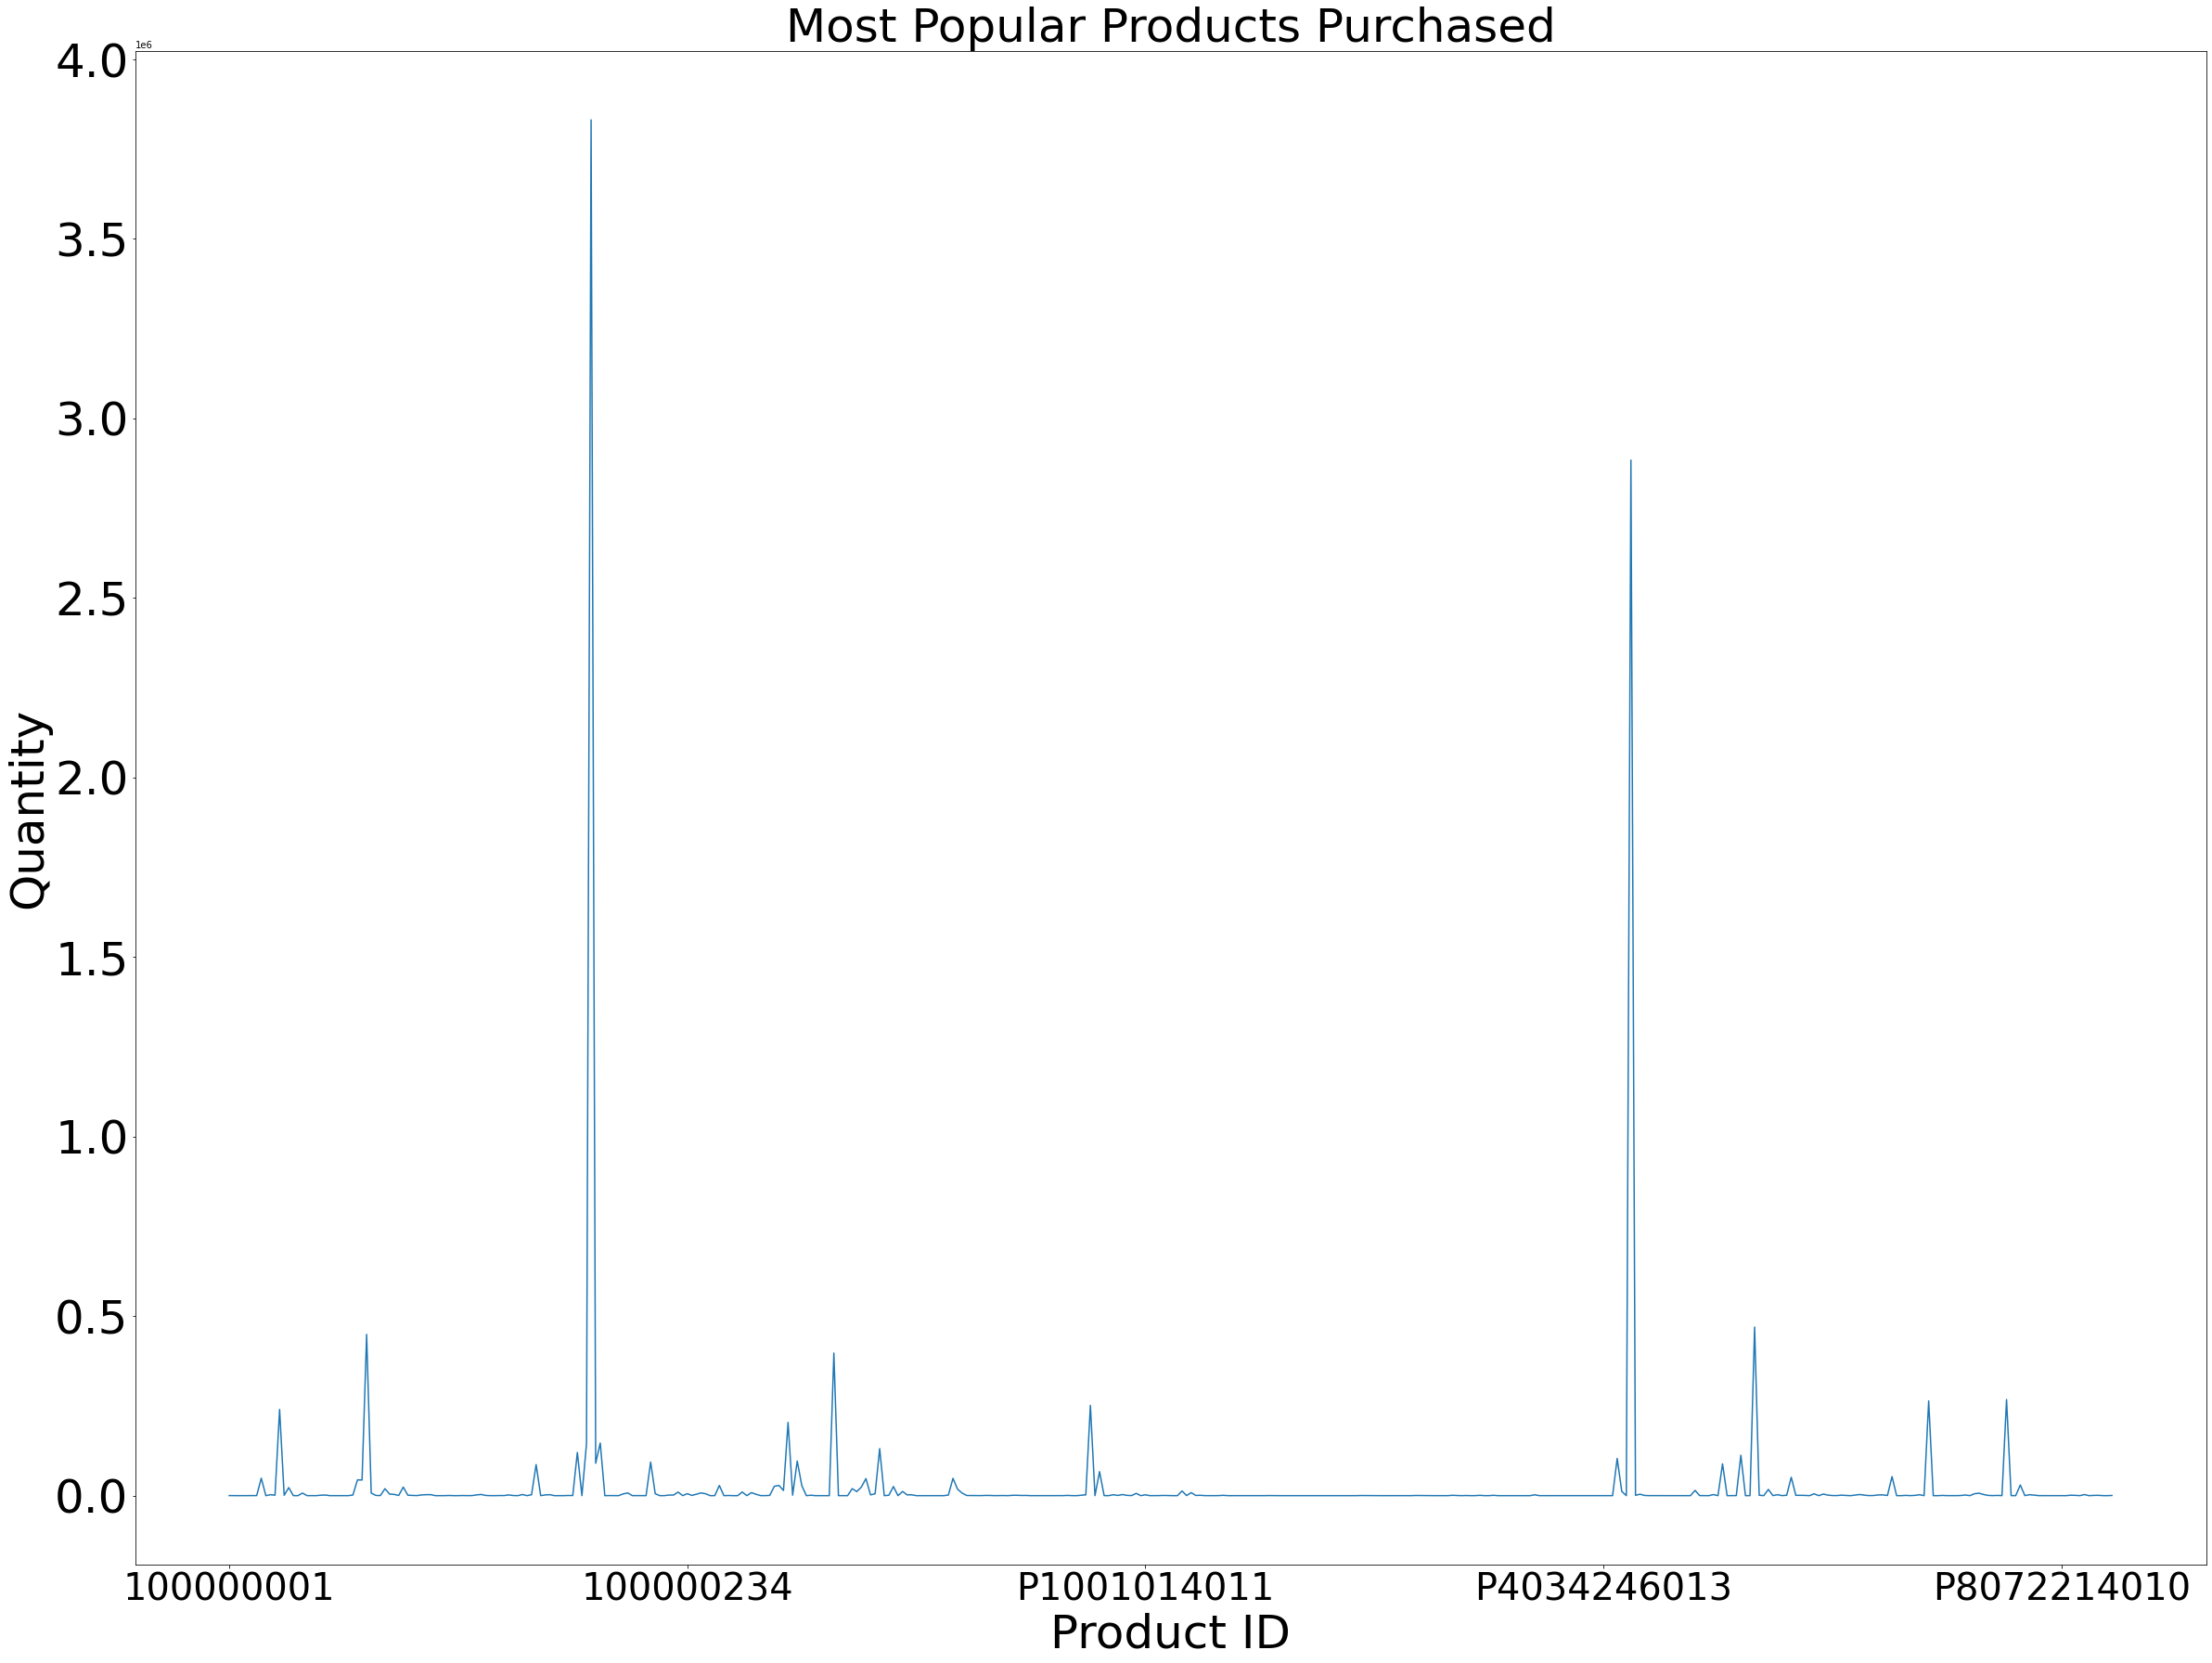

In [43]:
display = new.plot(figsize=(40, 30))
display.set_title("Most Popular Products Purchased", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Product ID', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

### OBSERVATION:
It is quite difficult to visualize this dataframe due to the enormity of columns needed to be displayed. They can barely fit the chart. Tried using a pie chart to see if it could visualize the data much better. Still, not so much improvement was notice

/home/aanudev/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aanudev/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


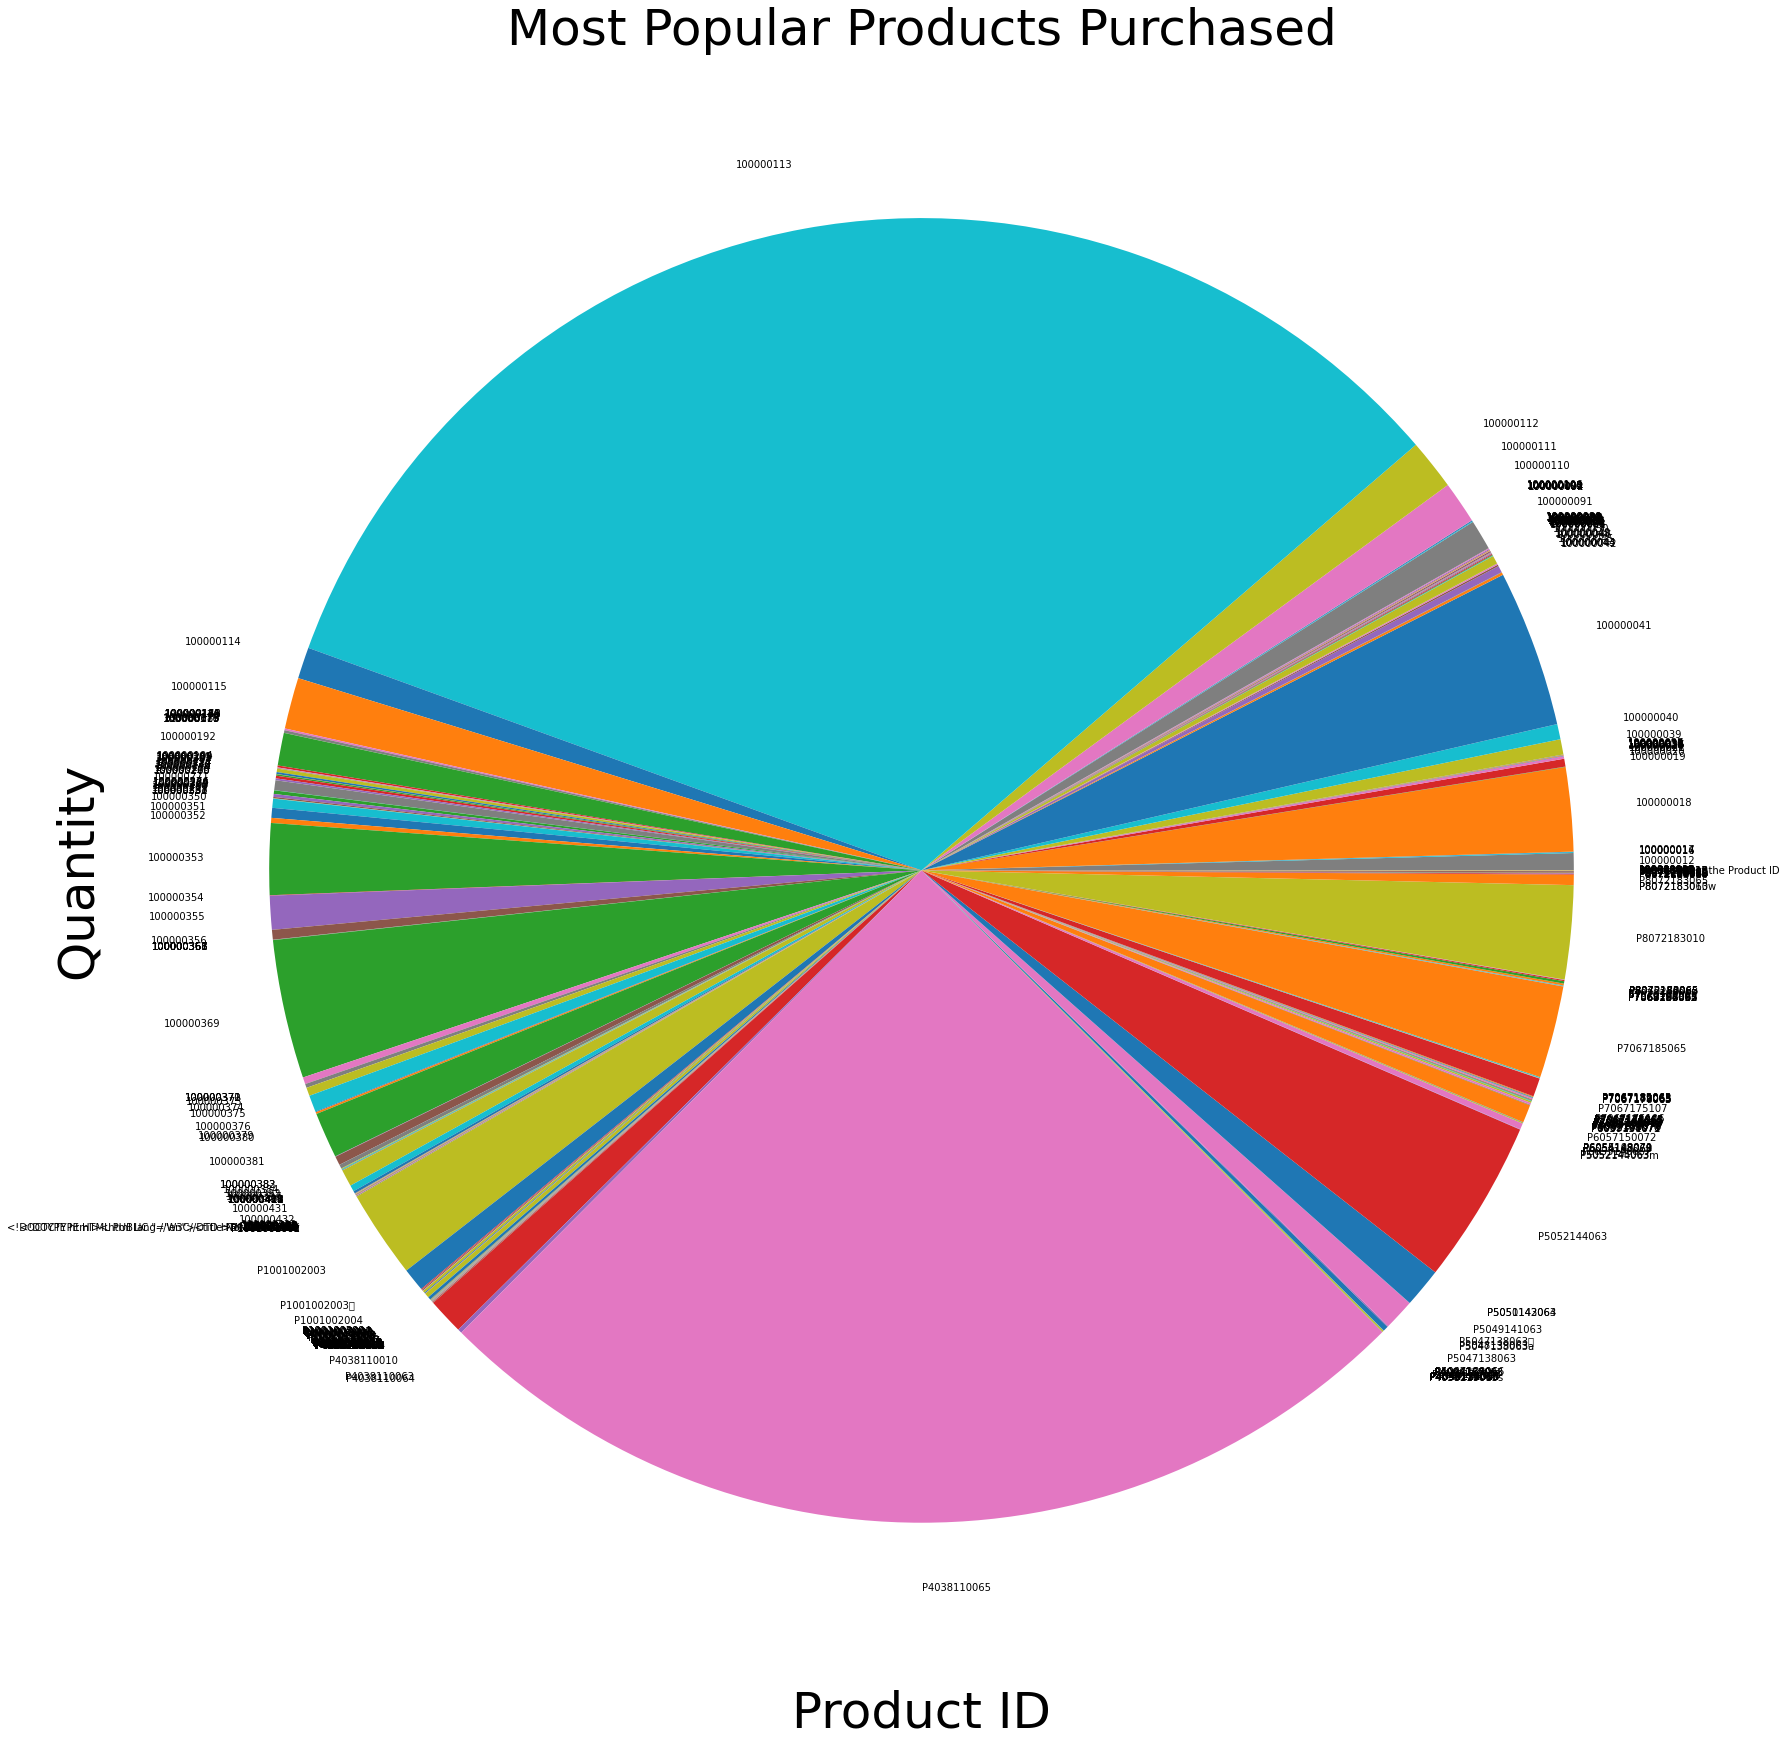

In [44]:
display = new.plot(figsize=(40, 30), kind="pie")
display.set_title("Most Popular Products Purchased", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Product ID', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

## Year with Most Quantity Purchased

In [45]:
# Importing datetime module to extract year
import datetime

In [46]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,waybill_id,description,product_id,ship_from,destination,delivery_address,intended_location,quantity,unit,batch_code,unit_of_measure,emailAddress,date,personnelName,status,hub,notes,transaction_type,year,month
id,,,,,,,,,,,,,,,,,,,,
1,WT0000000014-00001-1534516057,Admin: Advert and Promotion,100000001,NG-KN-1002-000R,T-000000000014,NaN,NaN,10.0,Sachets,NaN,NaN,rehobothi@yahoo.com,2018-08-17 14:27:37,Iyasele Rehoboth,Approved,NaN,NaN,Trans-Shipment,2018.0,8.0
2,WT0000000051-00007-1534517803,Admin:Cooking Gas,100000007,NG-TEST-1,T-000000000051,NaN,NaN,50.0,Bags,NaN,NaN,nnamdi.iwuji@babbangona.com,2018-08-17 14:56:43,Nnamdi Iwuji,Awaiting Approval,NaN,NaN,Sales Shipment,2018.0,8.0
3,WT0000000014-00003-1534520097,Admin: Bank Charge,100000003,NG-TEST-1,T-000000000014,NaN,NaN,10.0,Packs,BG5050,Bags,rehoboth.iyasele@babbangona.com,2018-08-17 15:34:57,Iyasele Rehoboth,Awaiting Approval,NaN,NaN,Shipment to Customers,2018.0,8.0
4,WT0000000014-00003-1534520151,Admin: Bank Charge,100000003,NG-TEST-2,T-000000000014,NaN,NaN,10.0,Single Items,4555,30 Metric Tons,rehobothi@yahoo.com,2018-08-17 15:35:51,Iyasele Rehoboth,Awaiting Approval,NaN,NaN,Shipment to Customers,2018.0,8.0
6,WT19-00045-43335.434,Produce:Maize-C-White(100kg),100000045,NG-KD-1002-0038,19,NaN,NaN,550.0,Bags,NaN,NaN,john.yohanna@doreopartners.com,2018-08-23 10:25:10,John Yohanna,Declined,NaN,NaN,Sales Shipment,2018.0,8.0


In [47]:
date_group = df.groupby("year")["quantity"].sum()
date_group

year
2018.0    3108396.10
2019.0    3400379.15
2020.0    5049813.00
Name: quantity, dtype: float64

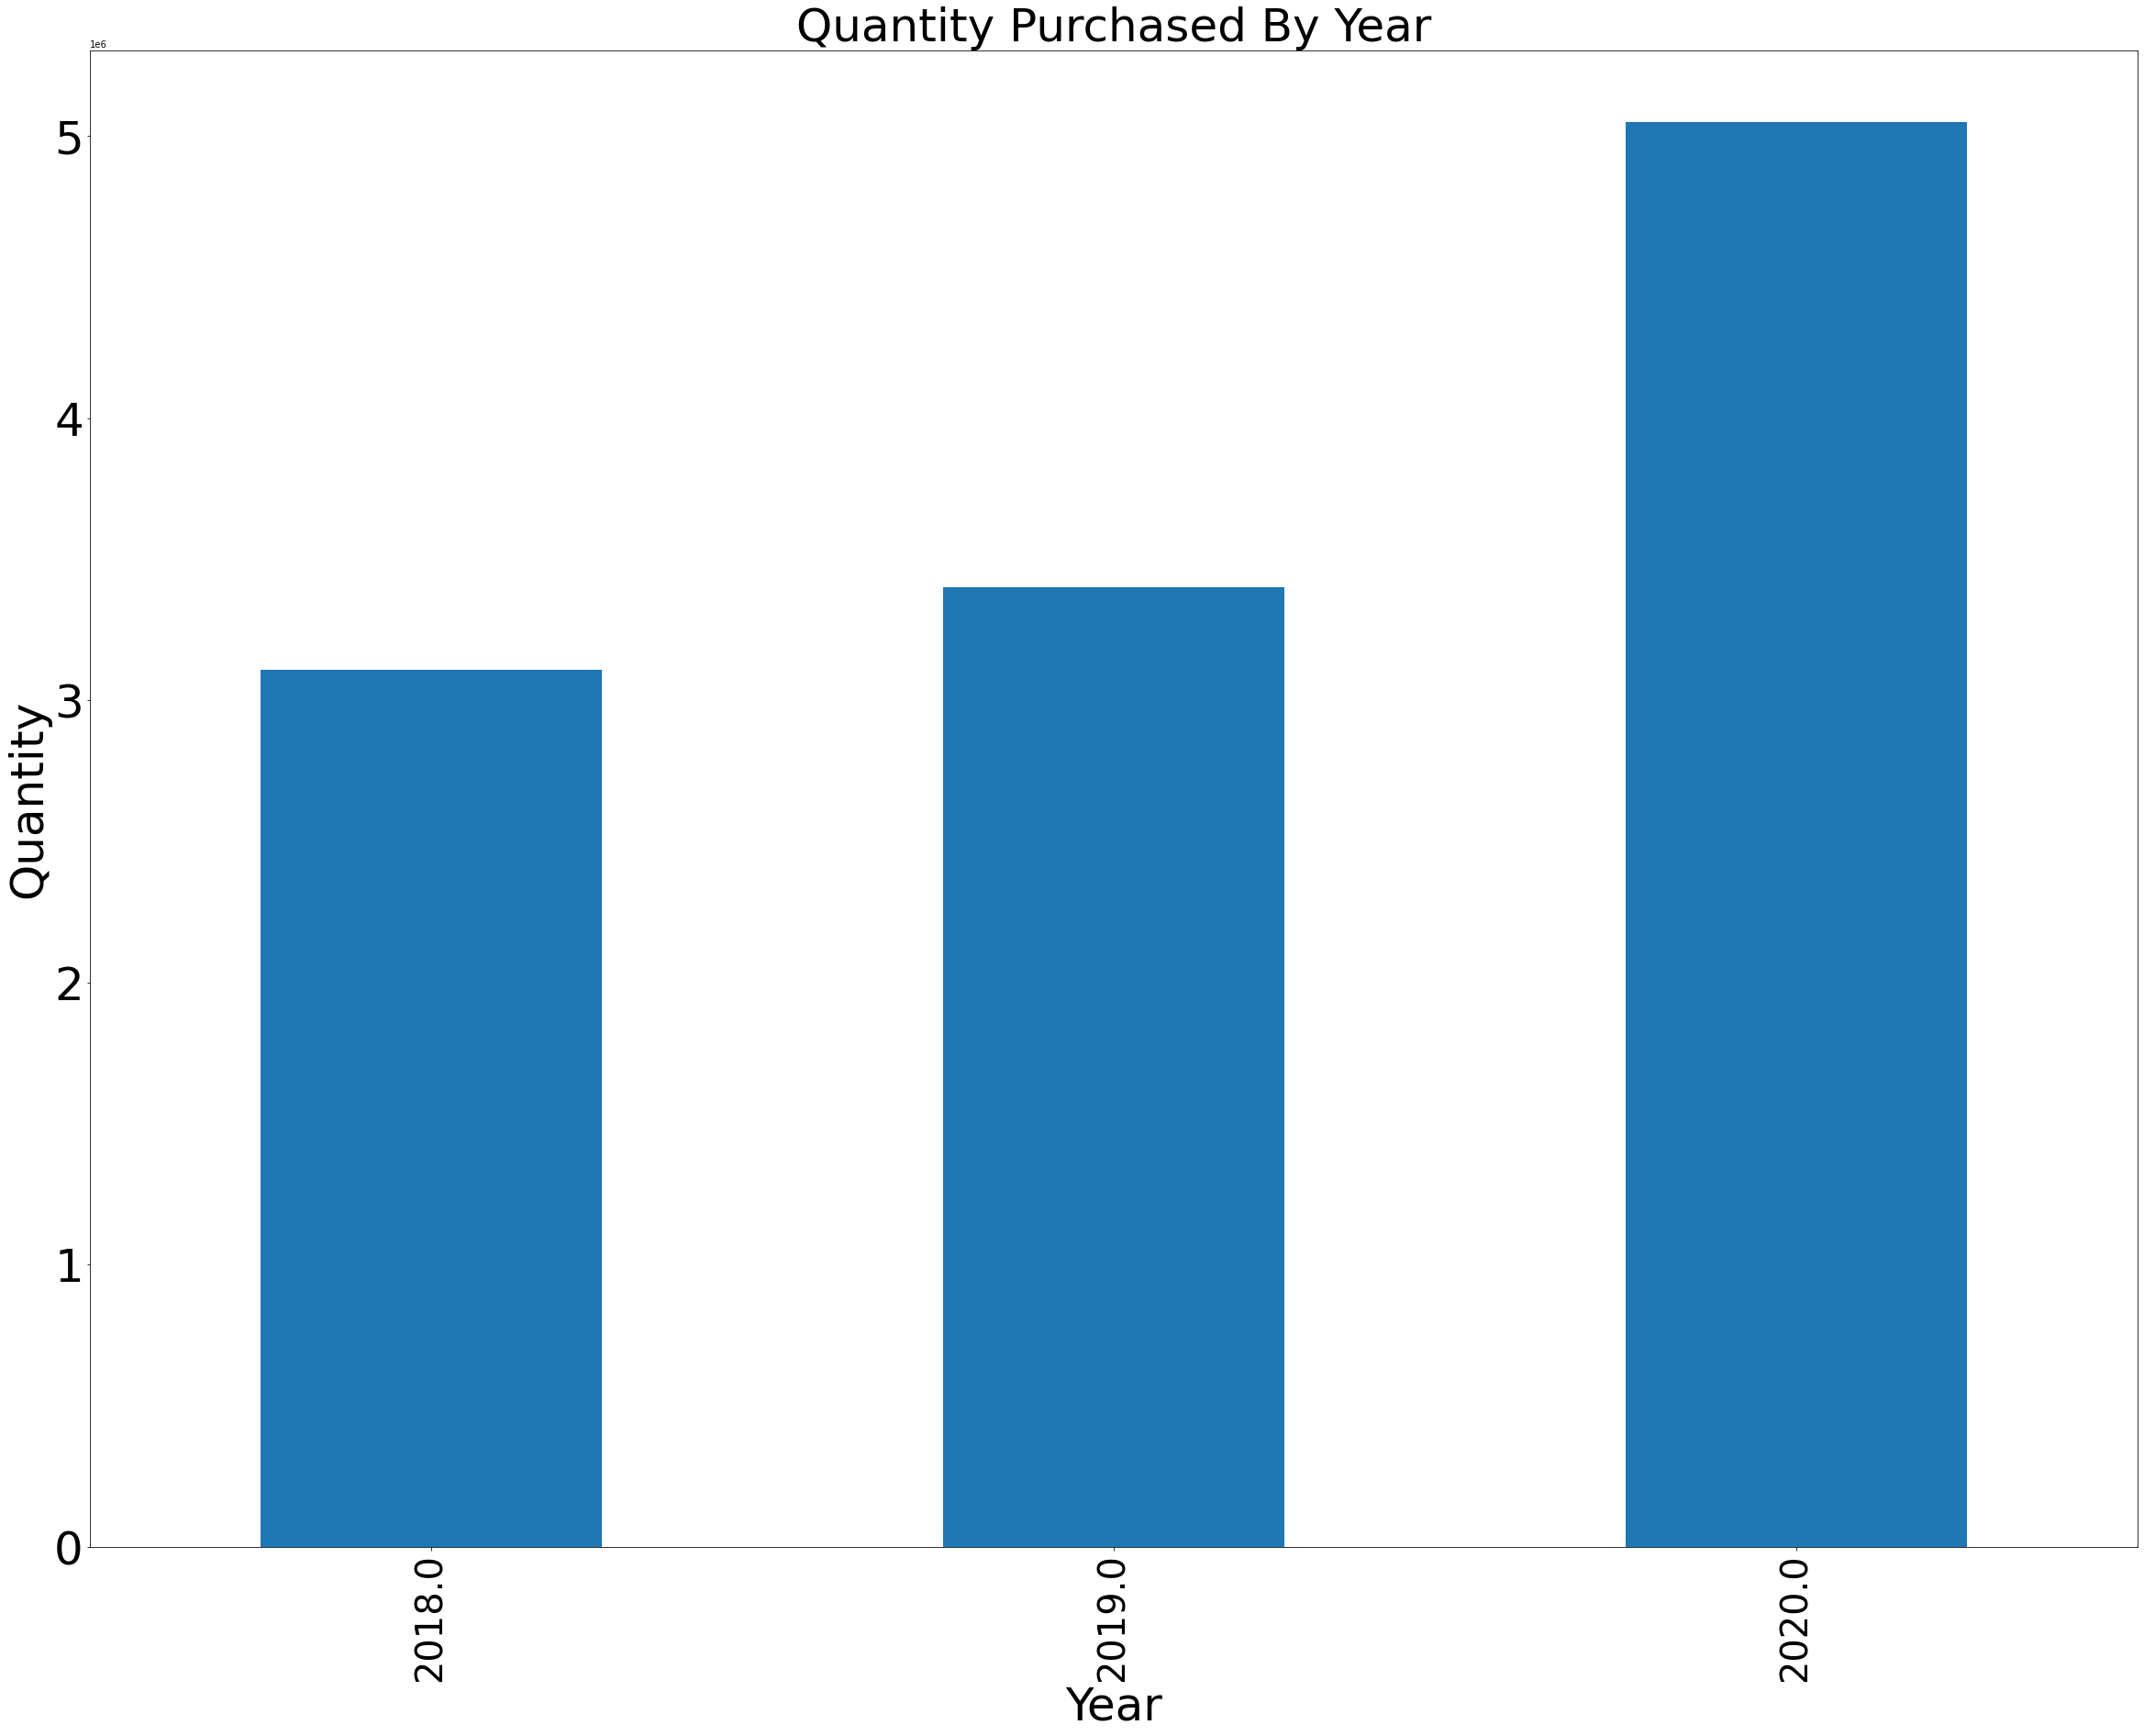

In [48]:
display = date_group.plot(figsize=(40, 30), kind="bar")
display.set_title("Quantity Purchased By Year", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Year', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

plt.show()

## Month with Most Quantity Purchased

In [57]:
import calendar

df['month'] = pd.to_numeric(df['month'], errors='coerce')
df = df.dropna(subset=['month'])
df['month'] = df['month'].astype(int)

df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

date_group = df.groupby("month")["quantity"].sum()

date_group

/home/aanudev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


month
Apr    1392409.45
Aug     414617.00
Dec     448983.60
Feb     325234.30
Jan     543222.60
Jul     711567.00
Jun    1183092.00
Mar     284654.80
May    1886635.00
Nov    1857349.00
Oct    1833070.50
Sep     677753.00
Name: quantity, dtype: float64

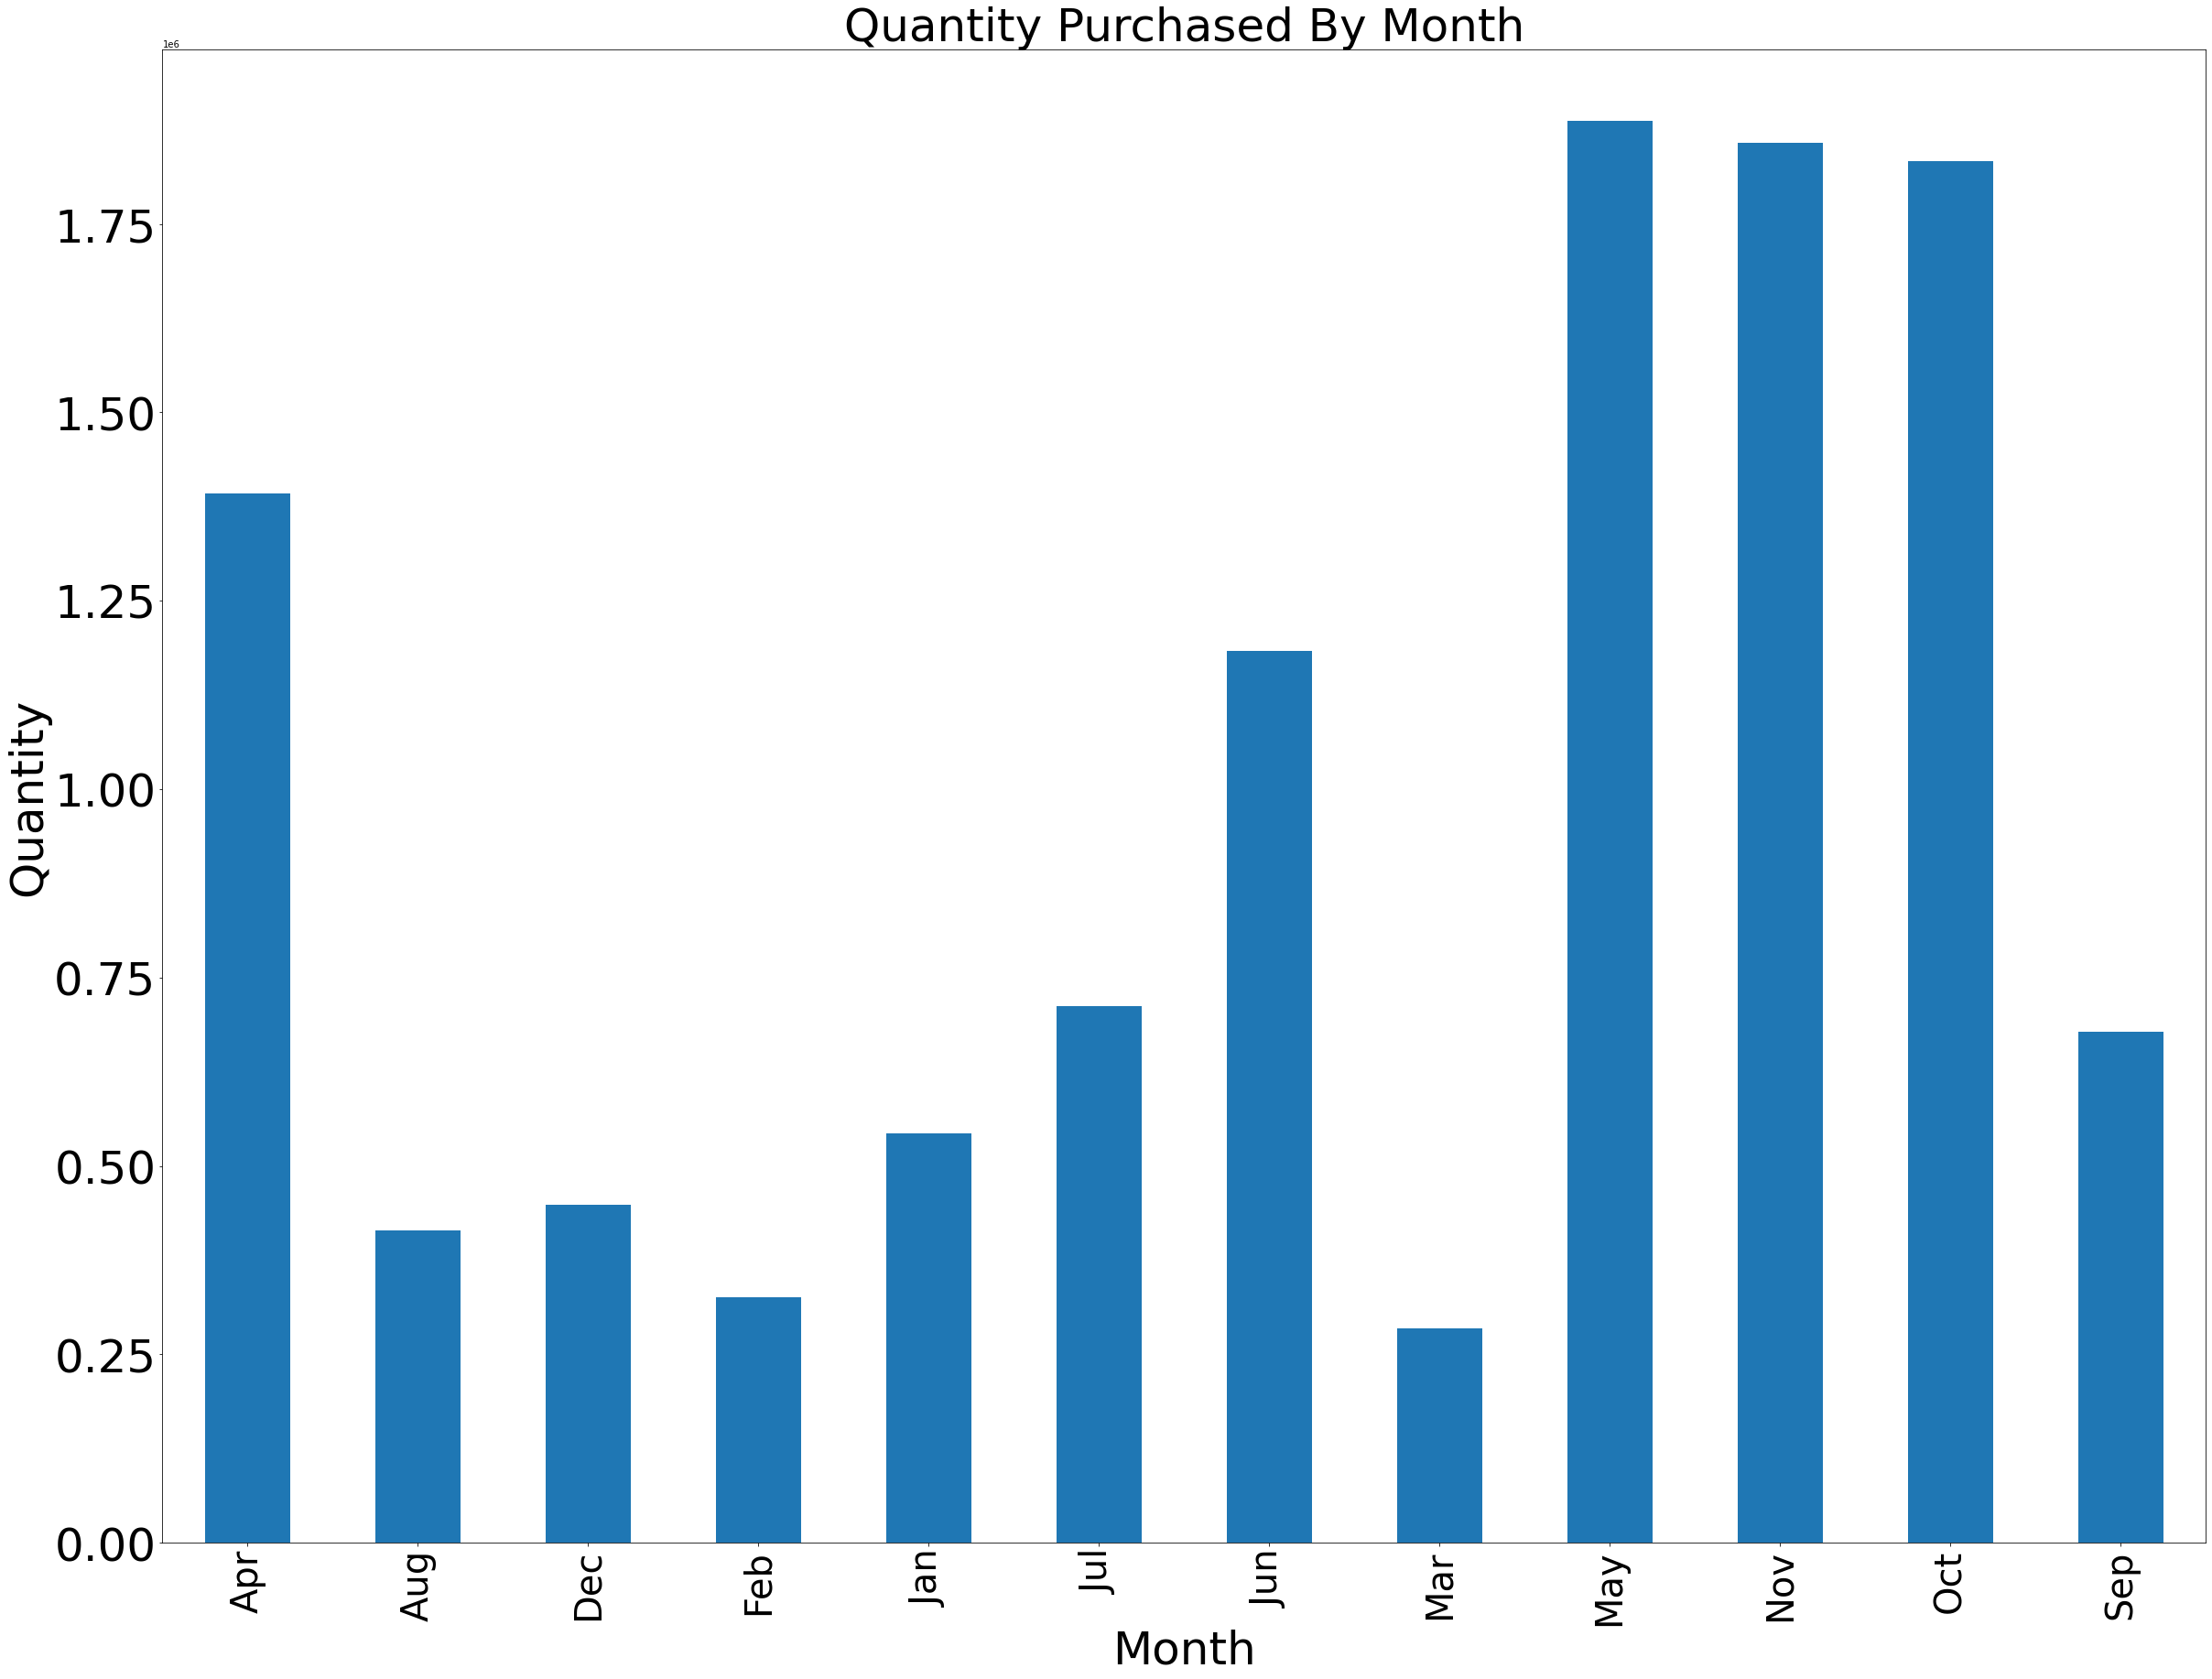

In [58]:
display = date_group.plot(figsize=(40, 30), kind="bar")
display.set_title("Quantity Purchased By Month", size=50)
display.set_ylabel('Quantity', size=50)
display.set_xlabel('Month', size=50)

for tick in display.xaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in display.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

plt.show()

### We can deduce from this chart that the peak activity months are March, November and October in that Order